In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ques_set = pd.read_csv('../data/processed/ques_with_one_tag_labelled.csv')

In [3]:
ques_set.shape

(22609, 7)

In [4]:
# Read-processed-tags-data-(in-two-formats)

# Gets a random 80% of the entire set
X_train = ques_set.sample(frac=0.8, random_state=10)

# Gets the left out portion of the dataset
X_test = ques_set.loc[~ques_set.index.isin(X_train.index)]

# alternatively
# from sklearn.model_selection import train_test_split

def find_occurance(df):
    for i in range(1,8):
        category= 'f'+str(i)
        row,col= df[df['Category'].apply(lambda x: x == category)].shape
        print "Total rows of Category 'f{i}': {row}".format(i=i,row=row)
print X_train.shape
print X_test.shape
find_occurance(X_train)
print "+=========+"
find_occurance(X_test)

(18087, 7)
(4522, 7)
Total rows of Category 'f1': 440
Total rows of Category 'f2': 1117
Total rows of Category 'f3': 4599
Total rows of Category 'f4': 753
Total rows of Category 'f5': 1506
Total rows of Category 'f6': 9564
Total rows of Category 'f7': 108
+=========+
Total rows of Category 'f1': 111
Total rows of Category 'f2': 279
Total rows of Category 'f3': 1120
Total rows of Category 'f4': 191
Total rows of Category 'f5': 361
Total rows of Category 'f6': 2438
Total rows of Category 'f7': 22


## Creating features (Title) and labels (Category)

In [5]:
train_features = np.array(X_train['Title']) # (X_train['Body'])
train_labels = np.array(X_train['Category'].apply(lambda x: int(x[1])))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words="english")
X_train_counts = count_vect.fit_transform(train_features.astype('U'))

In [6]:
print len(count_vect.get_feature_names())
# data= count_vect.vocabulary_
# pd.Data Frame.from_dict([data])
print count_vect.vocabulary_.get(u'html')
print len(count_vect.vocabulary_)

6651
2712
6651


In [7]:
# Tfidf transformation on countervectorized training data
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
tf_transformer.get_params(deep=True)

{'norm': u'l2', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': False}

## Training a classifier (Naive Bayes)

In [8]:
# Training the classifier (Naive Bayes)

from sklearn.naive_bayes import MultinomialNB
clf_naive = MultinomialNB().fit(X_train_tf, train_labels)

In [9]:
# Prediction on test data
test_features= np.array(X_test['Title'].apply(lambda x: str(x)))
test_labels= np.array(X_test['Category'].apply(lambda x: int(x[1])))

# Tlidf Transformation of test data
X_new_counts = count_vect.transform(test_features)
X_new_tfidf = tf_transformer.transform(X_new_counts)

predicted_naive = clf_naive.predict(X_new_tfidf)
np.mean(predicted_naive == test_labels)

0.86200796107916855

## Training classifier (SVM)

In [24]:
from sklearn.svm import SVC
clf_svc = SVC(kernel="rbf", C=10000.0)  #SVC(kernel="linear")
clf_svc.fit(X_train_tf, train_labels)
predicted_svc= clf_svc.predict(X_new_tfidf)
np.mean(predicted_svc == test_labels)
# C= 1000, rbf, accuracy=0.90070765148164533
# C=100000000.0, rbf, accuracy= 0.91110128261831047
# C=10000.0, rbf, accuracy= 0.93078283945157014
# C=100000.0, rbf, accuracy = 0.92105263157894735
# predicted_svc

0.92525431225121624

In [26]:
X_test1= X_test.copy()
def f(input):
    return 'f{x}'.format(x=(str(input)))
series=pd.Series(predicted_svc)
X_test1['Predicted Category']= series.apply(f)
print X_test1.shape, X_test.shape
find_occurance(X_test1[X_test1['Category']==X_test1['Predicted Category']])
find_occurance(X_test)



(4522, 8) (4522, 7)
Total rows of Category 'f1': 0
Total rows of Category 'f2': 0
Total rows of Category 'f3': 211
Total rows of Category 'f4': 0
Total rows of Category 'f5': 0
Total rows of Category 'f6': 0
Total rows of Category 'f7': 0
Total rows of Category 'f1': 111
Total rows of Category 'f2': 279
Total rows of Category 'f3': 1120
Total rows of Category 'f4': 191
Total rows of Category 'f5': 361
Total rows of Category 'f6': 2438
Total rows of Category 'f7': 22


In [17]:
# Checking how accuratly training data were matched correctly 

predicted_svc1= clf_svc.predict(X_train_tf)
print np.mean(predicted_svc1 == train_labels)

X_train1= X_train.copy()
series1=pd.Series(predicted_svc1)
X_train1['Predicted Category']= series1.apply(f)
print X_train1.shape, X_train.shape
find_occurance(X_train1[X_train1['Category']==X_train1['Predicted Category']])
find_occurance(X_train)

0.981533698236
(18087, 8) (18087, 7)
Total rows of Category 'f1': 8
Total rows of Category 'f2': 68
Total rows of Category 'f3': 1239
Total rows of Category 'f4': 28
Total rows of Category 'f5': 129
Total rows of Category 'f6': 3220
Total rows of Category 'f7': 0
Total rows of Category 'f1': 440
Total rows of Category 'f2': 1117
Total rows of Category 'f3': 4599
Total rows of Category 'f4': 753
Total rows of Category 'f5': 1506
Total rows of Category 'f6': 9564
Total rows of Category 'f7': 108


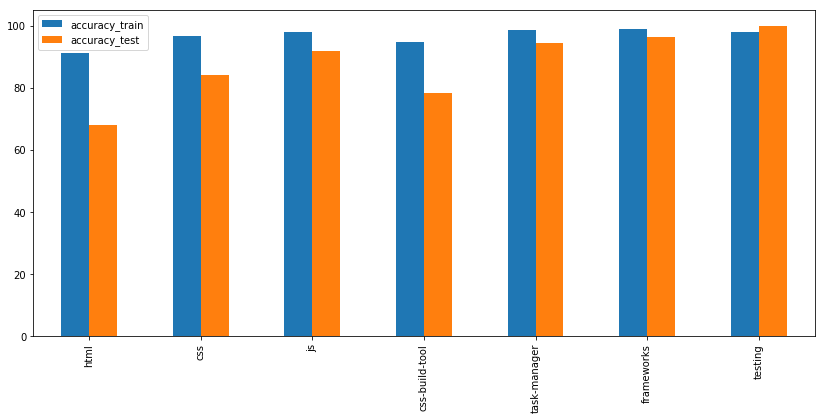

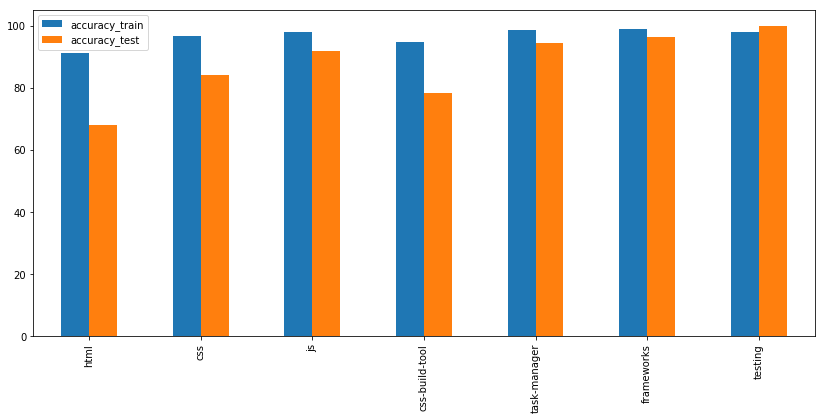

In [22]:
# Ploting bar chart on training and testing accuracy
training_accuracy_dict={
    'predicted':{
        'f1': 411,
         'f2': 1069,
         'f3': 4464,
         'f4': 701,
         'f5': 1462,
         'f6': 9534,
         'f7': 104 
    },
    'actual':{
         'f1': 451,
         'f2': 1104,
         'f3': 4561,
         'f4': 740,
         'f5': 1481,
         'f6': 9643,
         'f7': 106
    }
}

testing_accuracy_dict= {
    'predicted_x':{
        'f1': 68,
        'f2': 246,
        'f3': 1062,
        'f4': 160,
        'f5': 365,
        'f6': 2273,
        'f7': 24
    },
    'actual_x':{
        'f1': 100,
        'f2': 292,
        'f3': 1157,
        'f4': 204,
        'f5': 386,
        'f6': 2359,
        'f7': 24
    }
}
training_accuracy_df= pd.DataFrame.from_dict(training_accuracy_dict)
testing_accuracy_df= pd.DataFrame.from_dict(testing_accuracy_dict)
accuracy_df= pd.concat([training_accuracy_df,testing_accuracy_df], axis=1)
accuracy_df['accuracy_train']=accuracy_df['predicted']/accuracy_df['actual']*100
accuracy_df['accuracy_test']=accuracy_df['predicted_x']/accuracy_df['actual_x']*100

accuracy_df.plot(x=[['html','css','js','css-build-tool','task-manager','frameworks','testing']],
                 y=['accuracy_train', 'accuracy_test'], kind='bar', figsize=(14,6))

plt.show()


# Categorizing entire question dataset using trained model by SVM

In [29]:
ques_set_all_raw= pd.read_csv('../../datasets/stackoverflow/tag-wise-only_question/scripts/processed_data/no_duplicate_ques.csv')

In [37]:
ques_set_all_raw[ques_set_all_raw['PostTypeId'].apply(lambda x: x!=1)]

,Post Link,Score,ViewCount,Tags,Title,Body,CreationDate,AnswerCount,AcceptedAnswerId,ClosedDate,PostTypeId


In [36]:
# Removing a row which contains PostTypeId=2
# ques_set_all[ques_set_all['PostTypeId'].apply(lambda x: x!=1)]
ques_set_all_raw= ques_set_all_raw.drop(ques_set_all_raw.index[[380]])


col_req= ['Post Link', 'Tags', 'Title', 'Body', 'Score', 'ViewCount']
ques_set_all_temp = ques_set_all_raw[col_req]

In [38]:
ques_set_all_temp.shape

(258237, 6)

In [39]:
# Find NaN value in a dataframe
pd.isnull(ques_set_all_temp).sum()
# RESULT : NO NAN VALUES

Post Link    0
Tags         0
Title        0
Body         0
Score        0
ViewCount    0
dtype: int64

In [40]:
# ======preserving==========
ques_set_all_temp.to_csv('../data/processed/full_ques_set_unlabelled_new.csv', index=False)

# Read Full Ques Set For classification

In [41]:
full_ques_set= pd.read_csv('../data/processed/full_ques_set_unlabelled_new.csv')

In [42]:
full_ques_set

,Post Link,Tags,Title,Body,Score,ViewCount
0,111102,"['javascript', 'scope', 'closures']",How do JavaScript closures work?,<p>How would you explain JavaScript closures t...,7087,960479.0
1,503093,"['javascript', 'jquery', 'redirect']",How do I redirect to another page in JavaScrip...,<p>How can I redirect the user from one page t...,6075,3529104.0
2,1789945,"['javascript', 'string', 'substring', 'string-...",How to check if one string contains another su...,"<p>Usually, I would expect a <code>String.cont...",5685,3558952.0
3,1335851,"['javascript', 'syntax', 'jslint', 'use-strict']","What does ""use strict"" do in JavaScript, and w...","<p>Recently, I ran some of my JavaScript code ...",5334,739520.0
4,178325,"['javascript', 'jquery', 'dom', 'visibility']",How do I check if an element is hidden in jQuery?,<p>It is possible to toggle the visibility of ...,5317,1706552.0
5,336859,"['javascript', 'function', 'syntax', 'idioms']",JavaScript function declaration syntax: var fn...,<p>I've recently started maintaining someone e...,4768,714696.0
6,14994391,"['javascript', 'jquery', 'angularjs', 'design']","""Thinking in AngularJS"" if I have a jQuery bac...",<p>Suppose I'm familiar with developing client...,4535,706186.0
7,359494,"['javascript', 'operators', 'equality', 'equal...",Which equals operator (== vs ===) should be us...,"<p>I'm using <a href=""http://en.wikipedia.org/...",4353,989836.0
8,5767325,"['javascript', 'arrays']",How to remove a particular element from an arr...,"<p>I have an array of integers, which I'm usin...",3886,2906474.0
9,208105,"['javascript', 'javascript-objects', 'object-p...",How to remove a property from a JavaScript obj...,<p>Say I create an object as follows: </p>\n\n...,3554,1118601.0


In [43]:
# Predicting Full Question Set using SVM learnt model

# Preparing data
full_ques_set_title= np.array(full_ques_set['Title'].apply(lambda x: str(x)))

# Tlidf Transformation of test data
full_ques_set_features = count_vect.transform(full_ques_set_title)
full_ques_set_tfidf = tf_transformer.transform(full_ques_set_features)

full_ques_set_predict = clf_svc.predict(full_ques_set_tfidf)

In [44]:
len(full_ques_set_predict)

258237

In [45]:
# Introducing 'Predicted Category' column in the question dataset
def g(input):
    return 'f{x}'.format(x=input)
full_ques_set['Predicted Category'] = pd.Series(full_ques_set_predict).apply(g)

In [51]:
full_ques_set=full_ques_set[['Post Link', 'Predicted Category', 'Tags', 'Title', 'Body', 'Score', 'ViewCount']]
def find_occurance2(df):
    for i in range(1,8):
        category= 'f'+str(i)
        row,col= df[df['Predicted Category'].apply(lambda x: x == category)].shape
        print "Total rows of Category 'f{i}': {row}".format(i=i,row=row)

# ======preserving==========
full_ques_set.to_csv('../data/processed/predicted_by_svm_full_ques_set.csv', index=False)

# full_ques_set.shape
# #         (258237, 7)

find_occurance2(full_ques_set)
# #         Total rows of Category 'f1': 10854
# #         Total rows of Category 'f2': 21017
# #         Total rows of Category 'f3': 63170
# #         Total rows of Category 'f4': 17864
# #         Total rows of Category 'f5': 27442
# #         Total rows of Category 'f6': 111622
# #         Total rows of Category 'f7': 6268

Total rows of Category 'f1': 11188
Total rows of Category 'f2': 21164
Total rows of Category 'f3': 63506
Total rows of Category 'f4': 18099
Total rows of Category 'f5': 27292
Total rows of Category 'f6': 110664
Total rows of Category 'f7': 6324
